In [1]:
from proposed_dice import proposed_metric
from miccai_dice import dice

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import warnings
warnings.filterwarnings("ignore")

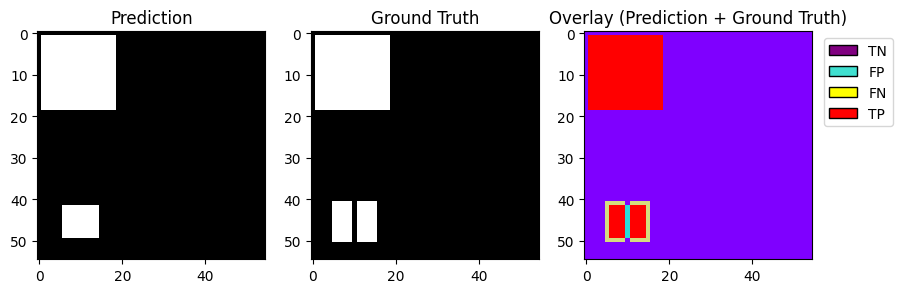


Prediction Component: 2 Covers GT Components: {2, 3}


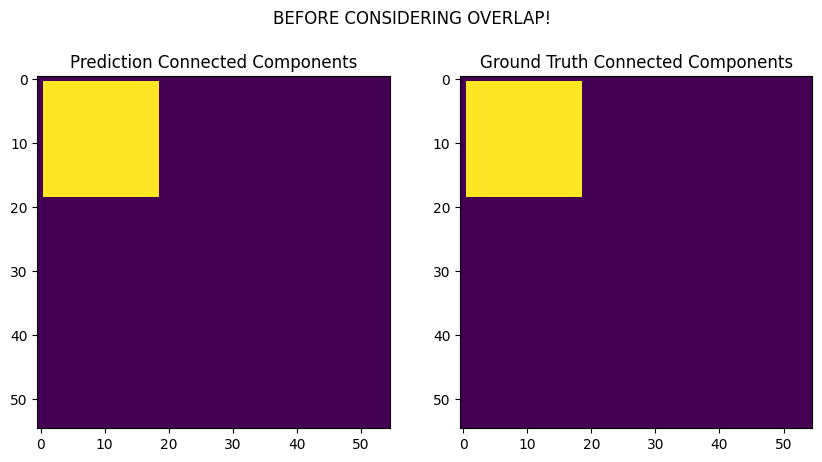

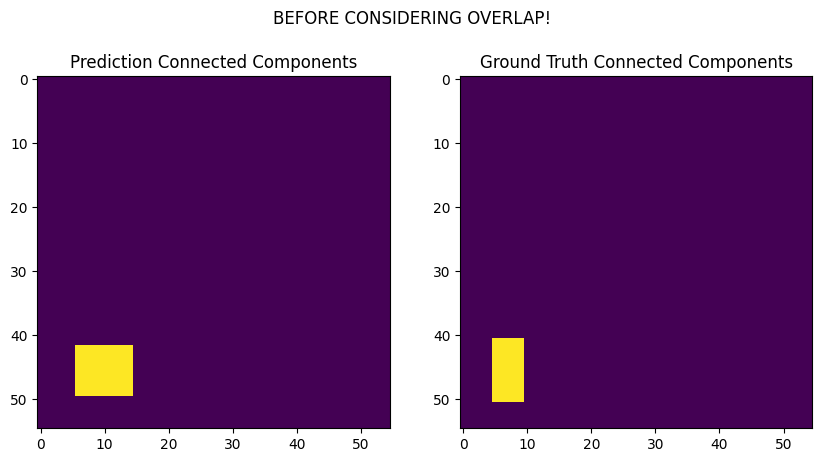

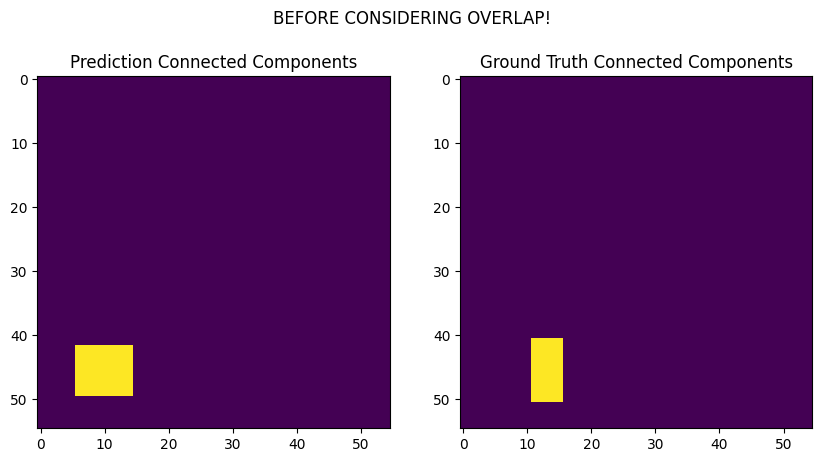

Values based on no overlap:
{'GT': 1, 'Pred': 1, 'Dice': 1.0}
{'GT': 2, 'Pred': 2, 'Dice': 0.5245901639344263}
{'GT': 3, 'Pred': 2, 'Dice': 0.5245901639344263}


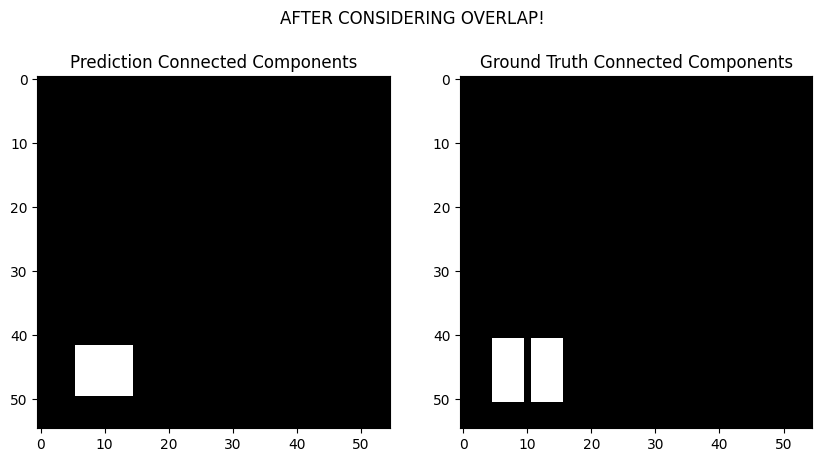

Values based on overlap:
{'GT': [2, 3], 'Pred': 2, 'Dice': 0.7441860465116279}

Tally of all values:
       GT  Pred      Dice
0       1     1  1.000000
1       2     2  0.524590
2       3     2  0.524590
3  [2, 3]     2  0.744186

Taking the set of the single and overlapped GTs based on Predicition component values:
       GT  Pred      Dice
0       1     1  1.000000
3  [2, 3]     2  0.744186

Proposed Dice: 0.872093023255814
Normal Dice  : 0.9463414634146341


In [2]:
pred = np.zeros((55, 55))
gt   = np.zeros((55, 55))

pred[1:19, 1:19] = 1
gt[1:19, 1:19] = 1

gt[41:51, 5:10] = 1
gt[41:51, 11:16] = 1
pred[42:50, 6:15] = 1

gt_display = gt*2

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(pred, cmap='gray')
ax[0].set_title('Prediction')

ax[1].imshow(gt_display, cmap='gray')
ax[1].set_title('Ground Truth')

im2 = ax[2].imshow(pred + gt_display, cmap='rainbow')
ax[2].set_title('Overlay (Prediction + Ground Truth)')

legend_elements = [Patch(facecolor='purple', edgecolor='black', label='TN'),
                   Patch(facecolor='turquoise', edgecolor='black', label='FP'),
                   Patch(facecolor='yellow', edgecolor='black', label='FN'),
                   Patch(facecolor='red', edgecolor='black', label='TP')]

# ax[2].legend(handles=legend_elements, loc='upper left')
ax[2].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.show()

print()
print('Proposed Dice:', proposed_metric(pred, gt))
print('Normal Dice  :', dice(pred, gt))